In [1]:
import lightning as L
import torch
from tools import PyTorchMLP, LightningModel, MNISTDataModule

In [2]:
from lightning.pytorch.loggers import CSVLogger

In [3]:
torch.manual_seed(42)

d_module = MNISTDataModule()

pt_model = PyTorchMLP(num_features=784, num_classes=10)

lightning_model = LightningModel(model=pt_model, learning_rate=0.05)

trainer = L.Trainer(
    max_epochs=10,
    accelerator="gpu",
    devices="auto",
    deterministic=True,
    logger=CSVLogger(save_dir="csv_logs", name="lt_model")
)

trainer.fit(model=lightning_model, datamodule=d_module)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type               | Params
--------------------------------------------------
0 | _model     | PyTorchMLP         | 40.8 K
1 | _train_acc | MulticlassAccuracy | 0     
2 | _val_acc   | MulticlassAccuracy | 0     
3 | _test_acc  | MulticlassAccuracy | 0     
--------------------------------------------------
40.8 K    Trainable params
0         Non-trainable params
40.8 K    Total params
0.163     Total estimated model p

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

D:\Programming Train\dl_lightning_ai_course\venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
D:\Programming Train\dl_lightning_ai_course\venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


   step  train_loss  epoch  val_acc  val_loss  train_acc
0    49    2.211631      0      NaN       NaN        NaN
1    99    1.785425      0      NaN       NaN        NaN
2   149    1.296056      0      NaN       NaN        NaN
3   199    0.821043      0      NaN       NaN        NaN
4   249    0.669267      0      NaN       NaN        NaN
          step  train_loss  epoch  val_acc  val_loss  train_acc
0   492.052632    0.691433      0   0.8966  0.365334   0.775375
1  1343.000000    0.341568      1   0.9032  0.322896   0.912071
2  2193.947368    0.230262      2   0.9292  0.249100   0.930260
3  3044.894737    0.214983      3   0.9358  0.211450   0.942666
4  3895.842105    0.187615      4   0.9400  0.193355   0.950342


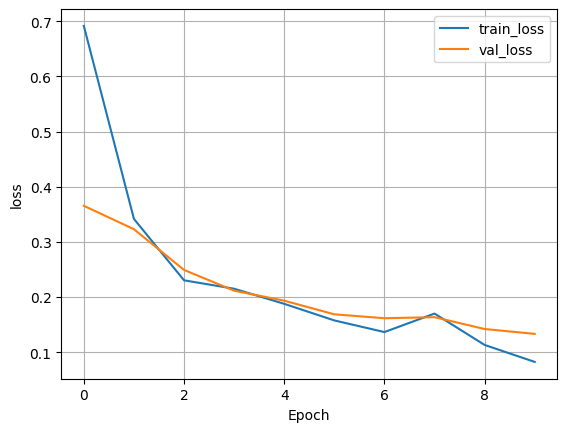

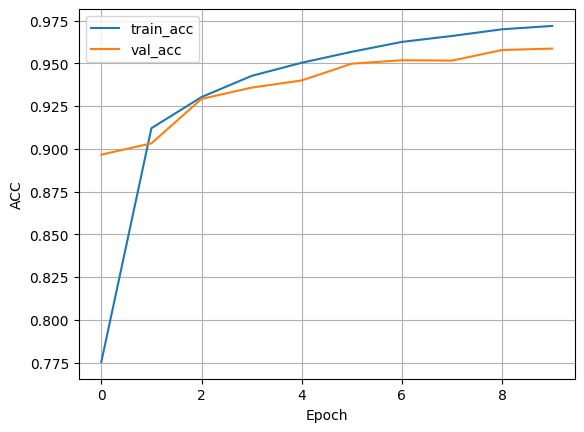

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
print(metrics.head())
aggr_metrics = []
agg_col = "epoch"

for i, dfg in metrics.groupby(agg_col):

    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggr_metrics.append(agg)

df_metrics = pd.DataFrame(aggr_metrics)
print(df_metrics.head())
df_metrics[["train_loss", "val_loss"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="loss"
)
df_metrics[["train_acc", "val_acc"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="ACC"
)

plt.show()

In [5]:
trainer.save_checkpoint("lt_model.ckpt")